<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Modulo_II/Lab_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5">APLICACIÓN DE REDES NEURONALES CONVOLUCIONALES</font></h1>

Utilizaremos el famoso [MNIST Dataset](https://cocl.us/0uk5s) para construir dos redes neuronales capaces de realizar la clasificación de dígitos escritos a mano. La primera red es un perceptrón multicapa simple (MLP) y la segunda es una red neuronal convolucional (CNN de ahora en adelante). En otras palabras, cuando se le da una entrada, nuestro algoritmo dirá, con algún error asociado, qué tipo de dígito representa esta entrada.

---


<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong></strong></font>
<br>
<h2>Tabla de Contenidos</h2>
<ol>
    <li><a href="#ref1">¿Qué es Deep Learning?</a></li>
    <li><a href="#ref2">Test: ¿Cómo Trabaja TensorFlow?</a></li>
    <li><a href="#ref3">Parte 1: Clasifica MNIST usando un modelo simple</a></li>
    <li><a href="#ref4">Evaluando el resultado final</a></li>
    <li><a href="#ref5">Cómo potenciar el modelo?</a></li>
    <li><a href="#ref6">Parte 2: Aplicando Deep Learning en MNIST</a></li>
    <li><a href="#ref7">Resumen: Red neuronal convolucional profunda (Deep Convolutional Neural Network)</a></li>
    <li><a href="#ref8">Definiendo funciones y entrenando el modelo</a></li>
    <li><a href="#ref9">Evaluando el modelo</a></li>
</ol>    
</div>

<hr>

<a id="ref1"></a>
<h2>¿Qué es Deep Learning?</h2>

<b>Teoría:</b> Deep Learning (también conocido como aprendizaje estructurado profundo, aprendizaje jerárquico o aprendizaje automático profundo) es una rama del aprendizaje automático basada en un conjunto de algoritmos que intentan modelar abstracciones de alto nivel en datos mediante el uso de múltiples capas de procesamiento, con estructuras complejas o de otro tipo, compuesto por múltiples transformaciones no lineales.

<img src="https://ibm.box.com/shared/static/gcbbrh440604cj2nksu3f44be87b8ank.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">Es el momento perfecto para deep learning. Nuestro cerebro no funciona con solo una o tres capas. ¿Por qué sería diferente con las máquinas ? </div>

<b>Definiendo "Deep":</b> en este contexto, "deep" significa que estamos estudiando una red neuronal que tiene varias capas ocultas (más de una), sin importar el tipo (convolucional, agrupación, normalización, totalmente conectada, etc.). La parte más interesante es que algunos artículos notaron que las redes neuronales profundas con las arquitecturas / hiperparámetros correctos logran mejores resultados que las redes neuronales superficiales con el mismo poder computacional (por ejemplo, número de neuronas o conexiones). 

<b>En la práctica, definiendo "Learning":</b> En el contexto del aprendizaje supervisado, el reconocimiento de dígitos en nuestro caso, la parte de aprendizaje consiste en un target / característica que se va a predecir utilizando un conjunto dado de observaciones con la predicción final ya conocida (etiqueta). En nuestro caso, el objetivo será el dígito (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) y las observaciones son la intensidad y la posición relativa de los píxeles. Después de algún entrenamiento, es posible generar una "función" que mapee las entradas (imagen de dígitos) a las salidas deseadas (tipo de dígito). El único problema es qué tan bien se produce esta operación de mapa. Al tratar de generar esta "función", el proceso de entrenamiento continúa hasta que el modelo alcanza el nivel deseado de precisión en los datos de entrenamiento.

<hr>

<h2>Instalando TensorFlow </h2>

Comenzamos instalando TensorFlow versión 2.2.0 y sus requisitos previos requeridos.

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

<b>Considera:</b> Este notebook ha sido creado usando TensorFlow versión 2.2, y podría no trabajar correctamente en otras versiones. Comprueba aquí:

In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ >= '2.2.0':
    printmd('<<<<<!!!!! ERROR !!!! por favor realice el upgrade para el TensorFlow 2.2.0, o resetear tu Kernel (Kernel->Restart & Clear Output)>>>>>')

Primero clasificamos MNIST usando un perceptrón multicapa simple y luego, en la segunda parte, usamos el aprendizaje profundo para mejorar la precisión de nuestros resultados.

<a id="ref3"></a>
<h2>Parte 1: Clasificando MNIST usando un modelo simple.</h2>

Vamos a crear un perceptrón multicapa simple, un tipo simple de red neuronal, para realizar tareas de clasificación en el conjunto de datos de dígitos MNIST. Si no está familiarizado con el dataset MNIST, para leer más: <a href="https://cocl.us/0uk5s">click aquí</a> 

<h3>¿Qué es MNIST?</h3>

Según el sitio web de LeCun, el MNIST es una: "dataset de dígitos escritos a mano que tiene un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Es un subconjunto de un conjunto más grande disponible en NIST. Los dígitos han sido de tamaño normalizado y centrado en una imagen de tamaño fijo ".

Importe el dataset MNIST con la función integrada de TensorFlow</h3>

Es muy importante notar que MNIST es un dataset altamente optimizado y no contiene imágenes. Deberá crear su propio código si desea ver los dígitos reales. Otra nota al margen importante es el esfuerzo que los autores invirtieron en este dataset con operaciones de normalización y centrado. 

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train

In [ ]:
y_train

Los datos de características están entre 0 y 255, y lo normalizaremos para mejorar el rendimiento de optimización.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Revisemos los primeros valores de etiqueta:

In [ ]:
print(y_train[0:5])

[5 0 4 1 9]


El esquema de etiquetas actual simplemente identifica la categoría a la que pertenece cada punto de datos (a cada dígito escrito a mano se le asigna una categoría igual al valor numérico). Necesitamos convertir esto en un one-hot encoded vector. A diferencia de la representación binaria, las etiquetas se presentarán de manera que para representar un número N, the $N^{ésimo}$ bit es 1 mientras que los otros bits ason 0. Por ejemplo, cinco y cero en un código binario serían:

<pre>
Representación numérica:    0
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       0       0       0 

Representación numérica:    5
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       1       0       1  
</pre>

Usando una notación diferente, los mismos dígitos usando la representación de un vector activo se pueden mostrar como:

<pre>
Representación numérica:   0
One-hot encoding:        [5]   [4]    [3]    [2]    [1]   [0]  
Array/vector:             0     0      0      0      0     1   

Representación numérica:   5
One-hot encoding:        [5]   [4]    [3]    [2]    [1]    [0]  
Array/vector:             1     0      0      0      0      0   
</pre>

Esta es una operación estándar y se muestra a continuación.



In [ ]:
print("Targets categóricos")
print(y_train[0:5])

# Target one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded Target")
print(y_train[0:5])

Targets categóricos
[5 0 4 1 9]
one hot encoded Target
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


<h3>Analizando la data importada</h3>

Los datos importados se pueden dividir de la siguiente manera:

- Training >>  Utilice el conjunto de datos proporcionado con entradas y salidas relacionadas para el entrenamiento de NN. En nuestro caso, si da una imagen que sabe que representa un "nueve", este conjunto le dirá a la red neuronal que esperamos un "nueve" como salida.  
        - 60,000 observaciones
        - x_train para los inputs
        - y_train para los outputs/target
  
 
- Test >> El modelo no tiene acceso a esta información antes de la fase de prueba. Se utiliza para evaluar el rendimiento y la precisión del modelo frente a "situaciones de la vida real". No hay más optimización más allá de este punto.
        - 10,000 observaciones
        - x_test para los inputs
        - y_test para los outputs/target
 
- La validación de data no es utilizada en este ejemplo.

In [ ]:
print("número de ejemplos de training:" , x_train.shape[0])
print("número de ejemplos de tests:" , x_test.shape[0])

número de ejemplos de training: 60000
número de ejemplos de tests: 10000


La nueva API de conjunto de datos en TensorFlow 2.X le permite definir tamaños de lote como parte del conjunto de datos. Esto le permite iterar a través de subconjuntos (batches) de datos durante el entrenamiento. Esta es una práctica común que mejora el rendimiento al calcular gradientes en lotes más pequeños. Veremos esto en acción durante el paso de entrenamiento.

Además, puede mezclar el conjunto de datos si cree que hay una distribución sesgada de datos en el conjunto de datos original que puede resultar en lotes con distribuciones diferentes. No estamos mezclando datos aquí.

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

<h3>Conversión de una imagen 2D en un vector 1D</h3>

Las imágenes MNIST son imágenes cuadradas en miniatura en blanco y negro con 28x28 píxeles. A cada píxel se le asigna una intensidad (originalmente en una escala de 0 a 255). Para que la entrada sea útil para nosotros, necesitamos que estos estén organizados en un vector 1D usando una estrategia consistente, como se muestra en la figura siguiente. Podemos usar Flatten para realizar esta tarea.

In [ ]:
# Ejemplo de una clase Flatten y operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


<img src="Flatten.png" alt="HTML5 Icon" style="width:350px"> 
<div style="text-align:center">Ilutstración de la operación de Flattening</div>

<h3>Asignando bias y pesos a los tensores null </h3>

Ahora vamos a crear los pesos y los sesgos, para ello se utilizarán como matrices llenas de ceros. Los valores que elegimos aquí pueden ser críticos, pero cubriremos una mejor manera en la segunda parte, en lugar de este tipo de inicialización.
Dado que estos valores se ajustarán durante el proceso de optimización, los definimos usando `tf.Variable`.

NOTA: `tf.Variable` crea variables ajustables que están en el espacio de nombres global, por lo que cualquier función que haga referencia a estas variables no necesita pasar las variables. Pero son globales, ¡cuidado al nombrar!

In [ ]:
# Peso del tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))

# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

<h3>Agregando pesos y  Biases al input</h3>


La única diferencia para nuestra siguiente operación con respecto a la imagen de abajo es que estamos usando la convención matemática para lo que se está ejecutando en la ilustración. La operación tf.matmul realiza una multiplicación de matrices entre x (inputs) y W (pesos) y, después del código, agrega bias.


<img src="https://ibm.box.com/shared/static/88ksiymk1xkb10rgk0jwr3jw814jbfxo.png" alt="HTML5 Icon" style="width:350px"> 
<div style="text-align:center">Ilustración que muestra cómo se agregan pesos y sesgos a las neuronas / nodos. </div>


In [ ]:
def forward(x):
    return tf.matmul(x,W) + b

<h3> Regression Softmax</h3>

Softmax es una función de activación que se utiliza normalmente en problemas de clasificación. Genera las probabilidades de la salida. Por ejemplo, nuestro modelo no estará 100% seguro de que un dígito sea el número nueve, en cambio, la respuesta será una distribución de probabilidades donde, si el modelo es correcto, el número nueve tendrá una probabilidad mayor que los otros dígitos.

A modo de comparación, a continuación se muestra el vector one-hot para una etiqueta de nueve dígitos:

 0 --> 0  
 1 --> 0 
 2 --> 0
 3 --> 0
 4 --> 0
 5 --> 0
 6 --> 0
 7 --> 0
 8 --> 0
 9 --> 1

Una máquina no tiene toda esta certeza, por lo que queremos saber cuál es la mejor suposición, pero también queremos entender qué tan segura estaba y cuál era la segunda mejor opción. A continuación se muestra un ejemplo de una distribución hipotética de nueve dígitos:

 0 -->0.01  
 1 -->0.02  
 2 -->0.03  
 3 -->0.02  
 4 -->0.12  
 5 -->0.01  
 6 -->0.03
 7 -->0.06
 8 -->0.10
 9 -->0.60 

Softmax es simplemente un exponencial de cada valor de un vector que también está normalizado. La formula es:

$$\sigma(z_i) = \frac{e^{z_i}}{\sum{e^{z_i}}}$$

In [ ]:
# un ejemplo de cálculo softmax en un vector de entrada
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("cálculo softmax")
print(softmax.numpy())
print("verificando la  normalización")
print(tf.reduce_sum(softmax))
print("encontrar el vector con mayor valor (label assignment)")
print("categoría", tf.argmax(softmax).numpy())

cálculo softmax
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verificando la  normalización
tf.Tensor(1.0, shape=(), dtype=float32)
encontrar el vector con mayor valor (label assignment)
categoría 0


Ahora podemos definir nuestra capa de salida


In [ ]:
def activate(x):
    return tf.nn.softmax(forward(x))

La salida de la función logística se utiliza para la clasificación entre dos targets 0/1. La función Softmax es un tipo generalizado de función logística. Es decir, Softmax puede generar una distribución de probabilidad categórica multiclase.

Creemos una función de modelo por conveniencia.



In [ ]:
def model(x):
    x = flatten(x)
    return activate(x)

<h3>Función de Coste</h3>

Es una función que se utiliza para minimizar la diferencia entre las respuestas correctas (labels) y los resultados estimados por nuestra Red. Aquí usamos la función de entropía cruzada, que es una función de coste popular utilizada para modelos categóricos. La función se define en términos de probabilidades, por lo que debemos utilizar vectores normalizados. Se da como:

$$ CrossEntropy = \sum{y_{Label}\cdot \log(y_{Prediction})}$$

In [ ]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# Agregamos 1e-10 para prevenir errores en los cálculos zero

# función de coste para modelo no optimizado
cross_entropy(y_train, model(x_train)).numpy()

138155.1

<h3>Tipo de optimización: Descenso Gradiente</h3>

Esta es la parte en la que configura el optimizador para su red neuronal. Hay varios optimizadores disponibles, en nuestro caso usaremos Descenso Gradiente porque es un optimizador bien establecido.

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.25)

Ahora definimos el paso de entrenamiento. Este paso usa `GradientTape` para calcular automáticamente las derivadas de las funciones que hemos creado manualmente y las aplica usando el optimizador` SGD`.

In [ ]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        # calculando la función de pérdida
        current_loss = cross_entropy( y, model(x))
        # calculando el gradiente
        #(¡Esto es automático!¡Incluso con funciones especializadas!)
        grads = tape.gradient( current_loss , [W,b] )
        # Aplicar el SGD a nuestras variables W y b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

<h3>Training batches</h3>

Entrena usando Gradient Descent en minibatch.

En la práctica, Descenso Gradiente Batch no se usa a menudo porque es demasiado costoso computacionalmente. Lo bueno de este método es que tiene el gradiente real, pero con la costosa tarea de computación de usar todo el conjunto de datos de una vez. Debido a este problema, las redes neuronales suelen utilizar minibatch para entrenar.

Ya hemos dividido nuestro conjunto de datos completo en lotes de 50 cada uno utilizando la API de conjuntos de datos. Ahora podemos iterar a través de cada uno de esos batches para calcular un gradiente. Una vez que iteramos a través de todos los batches del dataset, completamos un **epoch** o un recorrido completo del dataset.

In [ ]:
# Para ejecutar esta celda varias veces poner cero a los pesos
# Peso del tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias del tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values = []
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # cada batch tiene 50 ejemplos
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reportando estadísticas batch intermitentes
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # recopilación de estadísticas en cada epoch ... función de coste y precisión
    # función de coste
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    # presición
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 


epoch  0 batch 500 loss: 321.2568
epoch  0 batch 1000 loss: 268.77676
end of epoch  0 loss 232957.34 accuracy 0.80016667
epoch  1 batch 500 loss: 191.31088
epoch  1 batch 1000 loss: 173.05966
end of epoch  1 loss 217268.58 accuracy 0.8214667
epoch  2 batch 500 loss: 219.25847
epoch  2 batch 1000 loss: 158.98907
end of epoch  2 loss 210818.14 accuracy 0.82808334
epoch  3 batch 500 loss: 157.10153
epoch  3 batch 1000 loss: 138.40044
end of epoch  3 loss 232570.4 accuracy 0.80981666
epoch  4 batch 500 loss: 214.29918
epoch  4 batch 1000 loss: 182.41684
end of epoch  4 loss 219563.36 accuracy 0.82241666
epoch  5 batch 500 loss: 225.64648
epoch  5 batch 1000 loss: 173.13219
end of epoch  5 loss 210040.0 accuracy 0.83205
epoch  6 batch 500 loss: 183.22713
epoch  6 batch 1000 loss: 174.01784
end of epoch  6 loss 199566.73 accuracy 0.8423
epoch  7 batch 500 loss: 211.75125
epoch  7 batch 1000 loss: 182.0682
end of epoch  7 loss 206548.44 accuracy 0.83536667
epoch  8 batch 500 loss: 166.04149
e

<h3>Test y Gráficos</h3>

Es común ejecutar diagnósticos intermitentes (como precisión y pérdida en todo el dataset) durante el entrenamiento. Aquí también calculamos una estadística de resumen en el dataset de prueba. Las métricas de ajuste para los datos de entrenamiento deben coincidir estrechamente con las de los datos de la prueba. Si las métricas de prueba son claramente menos favorables, esto puede ser una señal de overfitting.

In [ ]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.8420333
test accuracy 0.8369


<hr>

Los dos gráficos siguientes muestran el rendimiento de la optimización en cada **epoch**.

Text(0, 0.5, 'pérdida')

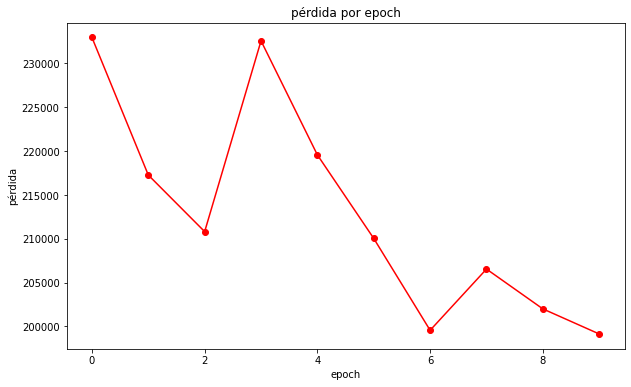

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("pérdida por epoch")
plt.xlabel("epoch")
plt.ylabel("pérdida")

Text(0, 0.5, 'precisión')

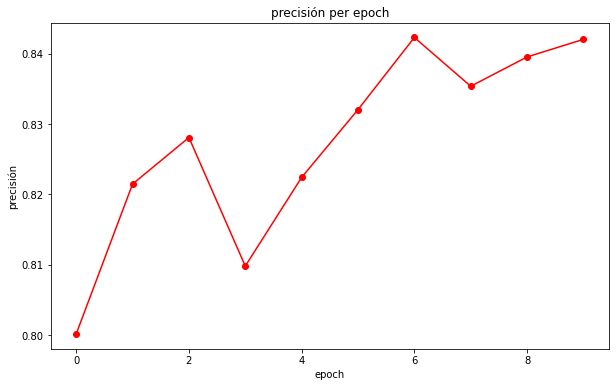

In [ ]:
plt.plot(accuracies,'-ro')
plt.title("precisión per epoch")
plt.xlabel("epoch")
plt.ylabel("precisión")

<a id="ref4"></a>
<h2>Evaluando el resultado final</h2>


La precisión del 84% no está mal considerando la simplicidad del modelo, pero en el pasado se logró una precisión> 90%.  

<a id="ref5"></a>
<h2>¿Cómo potenciar nuestro modelo?</h2>

<h4>Tenemos varias opciones:</h4>
<ul>
    <li>Regularización de redes neuronales mediante DropConnect</li>
    <li>Redes neuronales profundas de varias columnas para clasificación de imágenes</li> 
    <li>APAC: Clasificación de patrones aumentada con redes neuronales</li>
    <li>Red neuronal profunda simple con dropout</li>
</ul>
<h4>En la siguiente parte vamos a explorar la opción:</h4>
<ul>
    <li>Red neuronal profunda simple con deserción (más de 1 capa oculta)</li>
</ul> 

<a id="ref6"></a>
<h2>Parte 2: Aplicando Deep Learning en MNIST</h2>

En la primera parte, aprendimos cómo usar un ANN simple para clasificar MNIST. Ahora vamos a ampliar nuestro conocimiento utilizando una red neuronal profunda.
La arquitectura de nuestra red es:
    
- (Input) -> [batch_size, 28, 28, 1]  >> Aplicando 32 filtros de [5x5]
- (Capa Convolucional 1)  -> [batch_size, 28, 28, 32]
- (ReLU 1)  -> [?, 28, 28, 32]
- (Max pooling 1) -> [?, 14, 14, 32]
- (Capa Convolucional 2)  -> [?, 14, 14, 64] 
- (ReLU 2)  -> [?, 14, 14, 64] 
- (Max pooling 2)  -> [?, 7, 7, 64] 
- [capa fully connected 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [capa fully connected 4] -> [1x10]


Las próximas células explorarán esta nueva arquitectura.

<h3>The MNIST data</h3>

El dataset MNIST se utilizará del ejemplo anterior.

<h3>Parametros Iniciales</h3>

Crea parámetros generales para el modelo

In [ ]:
width = 28 # ancho de la imagen en píxeles
height = 28 # altura de la imagen en píxeles
flat = width * height # número de píxeles en una imagen
class_output = 10 # número de posibles clasificaciones para el problema

<h4>Conversión de imágenes del dataset a tensores</h4>

La imagen de entrada es de 28 píxeles por 28 píxeles, 1 canal (escala de grises). En este caso, la primera dimensión es el <b>número de batch</b> de la imagen, y puede ser de cualquier tamaño (así que lo configuramos en -1). La segunda y tercera dimensión son el ancho y el alto, y la última son los canales de imagen.

In [ ]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creando un nuevo conjunto de datos con un reshape de entradas 
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

Reducir el tamaño del conjunto de datos a partir de este momento porque Skills Netowrk Labs solo proporciona 4 GB de memoria principal, pero de lo contrario se necesitan 8.

In [ ]:
x_image_train.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
x_image_train = tf.slice(x_image_train, [0,0,0,0], [10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

<h3>Capa Convolucional 1</h3>

<h4>Definiendo el peso del kernel y el bias</h4>
Definimos un kernel aquí. El tamaño del filtro / kernel es 5x5; Los canales de entrada son 1 (escala de grises); y necesitamos 32 mapas de características diferentes (aquí, 32 mapas de características significa que se aplican 32 filtros diferentes en cada imagen. Por lo tanto, la salida de la capa de convolución sería 28x28x32). En este paso, creamos un tensor de forma de filtro / núcleo <code>[filter_height, filter_width, in_channels, out_channels]</code>

In [ ]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev = 0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # necesitamos 32 outputs y 32 biases.

<img src="https://ibm.box.com/shared/static/vn26neef1nnv2oxn5cb3uueowcawhkgb.png" style="width: 800px; height: 400px;" alt="HTML5 Icon" >

</h4>Convolucionar el peso del tensor and agregando biases.</h4>

Para crear una capa convolucional, usamos <b>tf.nn.conv2d</b>. Calcula una convolución 2-D dada la entrada 4-D y los tensores de filtro.

Inputs:
- tensor de forma [batch, in_height, in_width, in_channels]. x shape [batch_size,28 ,28, 1]
- un filtro / tensor de forma del tensor [filter_height, filter_width, in_channels, out_channels]. W es de tamaño [5, 5, 1, 32]
- stride which is  [1, 1, 1, 1]. La capa convolucional desliza la "ventana del tensor" a través del tensor de entrada. Como el tensor de entrada tiene 4 dimensiones:  [batch, height, width, channels], luego la convolución opera en una ventana 2D en las dimensiones de alto y ancho. __strides__ determina cuánto se desplaza la ventana en cada una de las dimensiones. Como la primera y la última dimensión están relacionadas con el lote y los canales, establecemos el paso en 1. Pero para la segunda y la tercera dimensión, podríamos establecer otros valores, por Ej. [1, 2, 2, 1]
    
    
Proceso:
- Cambie el filtro a una matriz 2-D con forma [5\*5\*1,32]
- Extrae parches de imagen del tensor de entrada para formar un tensor de forma *virtual* `[batch, 28, 28, 5*5*1]`.
- Para cada batch, multiplica a la derecha la matriz de filtro y el vector de imagen.

Output:
- Un `Tensor` (una convolución 2-D) de tamaño tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)- Nota: la salida de la primera capa de convolución es 32 [28x28] imágenes. Aquí 32 se considera como volumen/profundidad de la imagen de salida.

In [ ]:
def convolve1(x):
    return(tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

<img src="https://ibm.box.com/shared/static/iizf4ui4b2hh9wn86pplqxu27ykpqci9.png" style="width: 800px; height: 400px;" alt="HTML5 Icon" >


<h4>Aplicando la función de activación ReLU</h4>

En este paso, solo pasamos por la capa de convolución de todas las salidas, <b>convolve1</b>, y siempre que aparece un número negativo, lo cambiamos por un 0. Se llama Función de activación de ReLU.<br> Sea f (x) una función de activación de ReLU $f(x) = max(0,x)$.

In [ ]:
def h_conv1(x): 
  return(tf.nn.relu(convolve1(x)))

<h4>Aplicando max pooling</h4>

<b>max pooling</b> es una forma de muestreo descendente no lineal. Divide la imagen de entrada en un conjunto de rectángulos y, luego, encuentra el valor máximo para esa región.

Usemos <b>tf.nn.max_pool</b> función para realizar la agrupación máxima.
<b>Tamaño del Kernel:</b> 2x2 (si la ventana es una matriz de 2x2, resultaría en un píxel de salida)  
<b>Strides:</b> dicta el comportamiento deslizante del kernel. En este caso, se moverá 2 píxeles cada vez, por lo que no se superpondrá. La entrada es una matriz de tamaño 28x28x32 y la salida sería una matriz de tamaño 14x14x32.

<img src="https://ibm.box.com/shared/static/kmaja90mn3aud9mro9cn8pbbg1h5pejy.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 



In [ ]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Primera capa completada

<h3>Capa convolucional 2</h3>
<h4>Pesos y biases del Kernel</h4>

Aplicamos la convolución nuevamente en esta capa. Veamos el núcleo de la segunda capa:
- Filtro / kernel: 5x5 (25 píxeles)
- Canales de entrada: 32 (desde la primera capa Conv, teníamos 32 mapas de características)
- 64 mapas de características de salida

<b>Nota:</b> aquí, la imagen de entrada es [14x14x32], el filtro es [5x5x32], usamos 64 filtros de tamaño [5x5x32] y la salida de la capa convolucional sería 64 imágenes convolucionadas, [14x14x64].

<b>Nota:</b> el resultado de la convolución de aplicar un filtro de tamaño [5x5x32] sobre una imagen de tamaño [14x14x32] es una imagen de tamaño [14x14x1], es decir, la convolución funciona en volumen.

In [ ]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #necesita 64 biases para 64 outputs

<h4>Convierta la imagen con el tensor de peso y agregue biases.</h4>

In [ ]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

<h4>Aplicando la función de activación ReLU</h4>

In [ ]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

<h4>Aplicando max pooling</h4>

In [ ]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

Segunda capa completada. Entonces, ¿cuál es la salida de la segunda capa, capa 2?
- es una matriz de 64 de [7x7]


<h3>Capa Fully Connected</h3>

Necesita una capa completamente conectada para usar Softmax y crear las probabilidades al final. Las capas completamente conectadas toman las imágenes filtradas de alto nivel de la capa anterior, es decir, las 64 matrices, y las convierten en una matriz plana.

Por tanto, cada matriz [7x7] se convertirá en una matriz de [49x1], y luego se conectarán todas las 64 matrices, lo que hará una matriz de tamaño [3136x1]. Lo conectaremos a otra capa de tamaño [1024x1]. Por lo tanto, el peso entre estas 2 capas será [3136x1024]


<img src="https://ibm.box.com/shared/static/pr9mnirmlrzm2bitf1d4jj389hyvv7ey.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 


<h4>Flattening en la segunda Capa</h4>

In [ ]:
def layer2_matrix(x): 
  return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

<h4>Pesos y Biases entre la capa 2 y 3</h4>

Composición del mapa de características de la última capa (7x7) multiplicado por el número de mapas de características (64); 1027 salidas a la capa Softmax

In [ ]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # necesita 1024 biases para 1024 outputs

<h4>Multiplicación de matrices (aplicando ponderaciones y bias)</h4>

In [ ]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

<h4>Aplicando la función de activación ReLU</h4>

In [ ]:
def h_fc1(x): return tf.nn.relu(fcl(x))

Tercera capa completada

<h4>Capa de dropout, fase opcional para reducir overfitting</h4>

Es una fase en la que la red "olvida" algunas características. En cada paso de entrenamiento en un mini-lote, algunas unidades se apagan aleatoriamente para que no interactúen con la red. Es decir, sus ponderaciones no se pueden actualizar ni afectar el aprendizaje de los otros nodos de la red. Esto puede resultar muy útil para redes neuronales muy grandes para evitar el sobreajuste.

In [ ]:
keep_prob=0.5
def layer_drop(x): 
  return tf.nn.dropout(h_fc1(x), keep_prob)

<h4>Capa de Lectura (Softmax Layer)</h4>

Type: Softmax, Capa Fully Connected.

<h4>Pesos y Biases</h4>

En la última capa, CNN toma las imágenes filtradas de alto nivel y las traduce en votos usando softmax.
Canales de entrada: 1024 (neuronas de la 3ª capa); 10 funciones de salida

In [ ]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neuronas
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 posibilidades por dígitos [0,1,2,3,4,5,6,7,8,9]

<h4>Multiplicación de matrices (aplicando pesos y biases)</h4>

In [ ]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

<h4>Aplicando la función de activación Softmax</h4>
<b>softmax</b> nos permite interpretar las salidas de <b>fcl4</b> como probabilidades. Entonces, <b>y_conv</b> es un tensor de probabilidades.

In [ ]:
def y_CNN(x): return tf.nn.softmax(fc(x))

---

<a id="ref7"></a>
<h2>Resumen Red Neuronal convolucional profunda</h2>

Ahora es el momento de recordar la estructura de nuestra red neuronal.

#### 0) Input - MNIST dataset
#### 1) Convolucional y Max-Pooling
#### 2) Convolucional y Max-Pooling
#### 3) Capa Fully Connected
#### 4) Procesando - Dropout
#### 5) Capa de Lectura - Fully Connected
#### 6) Outputs - Classificando dígitos

---

<a id="ref8"></a>
<h2>Definir funciones y entrenar el modelo</h2>

<h4>Definir la función de coste</h4>

Necesitamos comparar nuestra salida, tensor de capa4, con la verdad fundamental para todos los mini_batch. nosotros podemos usar <b>cross entropy</b> para ver qué tan mal está funcionando nuestra CNN, para medir el error en una capa softmax.

El siguiente código muestra una muestra de juguete de entropía cruzada para un mini lote de tamaño 2 en el que se han clasificado sus artículos. Puede ejecutarlo (primero cambie el tipo de celda a <b>code</b> en la barra de herramientas) para ver cómo cambia la entropía cruzada.

import numpy as np
layer4_test =[[0.9, 0.1, 0.1],[0.9, 0.1, 0.1]]
y_test=[[1.0, 0.0, 0.0],[1.0, 0.0, 0.0]]
np.mean( -np.sum(y_test * np.log(layer4_test),1))

<b>reduce_sum</b> calcula la suma de elementos de<b>(y_ * tf.log(layer4)</b> a través de la segunda dimensión del tensor, y <b>reduce_mean</b> calcula la media de todos los elementos en el tensor.

$$ CrossEntropy = \sum{y_{Label}\cdot \log(y_{Prediction})}$$

In [ ]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

<h4>Definir el optimizador</h4>

Es obvio que queremos minimizar el error de nuestra red, que se calcula mediante la métrica cross_entropy. Para resolver el problema, tenemos que calcular gradientes para la pérdida (que minimiza la entropía cruzada) y aplicar gradientes a las variables. Lo hará un optimizador: Descenso Gradiente o Adagrad. 

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-4)

Siguiendo la convención de nuestro primer ejemplo, usaremos `GradientTape` para definir un modelo.

In [ ]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [ ]:
"""results = []
increment = 1000
for start in range(0,60000,increment):
    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])
    t = y_CNN(s)
    #results.append(t)
"""

<h4>Definir predicción</h4>
¿Quiere saber cuántos de los casos de un mini lote se han clasificado correctamente? vamos a contarlos.

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

<h4>Definir precisión</h4>
Tiene más sentido informar la precisión utilizando el promedio de casos correctos.

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

<h4>Sesión Run, train</h4>

<i>Si quieres un resultado rápido (<b>puede llevar algún tiempo entrenarlo</b>)</i>

In [ ]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # cada batch tiene 50 ejemplos
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reportar estadísticas de batch intermitentes
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  precisión
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  precisión
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  
    

epoch  0 batch 50 loss: 15.607309 accuracy 0.94
epoch  0 batch 100 loss: 21.425518 accuracy 0.88
epoch  0 batch 150 loss: 11.453228 accuracy 0.94
epoch  0 batch 200 loss: 7.4433417 accuracy 0.96
epoch  0 batch 250 loss: 14.979427 accuracy 0.8
epoch  0 batch 300 loss: 12.622277 accuracy 0.92
epoch  0 batch 350 loss: 20.197962 accuracy 0.94
epoch  0 batch 400 loss: 6.409218 accuracy 0.92
epoch  0 batch 450 loss: 16.453423 accuracy 0.86
epoch  0 batch 500 loss: 10.363175 accuracy 0.96
epoch  0 batch 550 loss: 10.632949 accuracy 0.96
epoch  0 batch 600 loss: 14.362846 accuracy 0.9
epoch  0 batch 650 loss: 12.041695 accuracy 0.94
epoch  0 batch 700 loss: 5.6133795 accuracy 0.98
epoch  0 batch 750 loss: 21.887321 accuracy 0.9
epoch  0 batch 800 loss: 11.9798975 accuracy 0.84
epoch  0 batch 850 loss: 9.148705 accuracy 0.96
epoch  0 batch 900 loss: 8.81819 accuracy 0.96
epoch  0 batch 950 loss: 10.392128 accuracy 0.9
epoch  0 batch 1000 loss: 15.65193 accuracy 0.92
epoch  0 batch 1050 loss: 4.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong><i>¡95% de precisión después de solo 1 epoch! Puede aumentar el número de epoch en la celda anterior si REALMENTE tiene tiempo para esperar, o la está ejecutando usando PowerAI (<b> cambie el tipo de celda a código</b>)</i></strong></font>

<i>PD. Si tiene problemas para ejecutar este portátil, apague todos sus portátiles en ejecución de Jupyter, borre todas las salidas de las celdas y ejecute cada celda solo después de completar la celda anterior.</i>

<hr>

<a id="ref9"></a>
<h2>Evalua el modelo</h2>

Print de la evaluación para el usuario

In [ ]:
j=0
acccuracies=[]
# evaluar la precisión por batch y promedio ... informar cada 100 batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("precisión de todo el conjunto", str(np.mean(accuracies)))            

<h3>Visualización</h3>

¿Quieres ver todos los filtros?

In [ ]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])

In [ ]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

¿Quiere ver la salida de una imagen pasando por la primera capa de convolución?


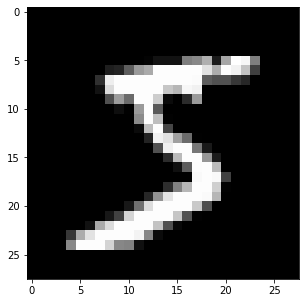

In [ ]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

In [ ]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
keep_prob=1.0
ActivatedUnits = convolve1(sampleimage)
                           
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

¿Qué pasa con la segunda capa de convolución?

In [ ]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")